<a href="https://colab.research.google.com/github/gorantlasuhas/git_new/blob/main/MLLab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("water_potability.csv").dropna()


data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [3]:
display(data)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [4]:
# Reduce dimensionality using PCA to 2 components
pca = PCA(n_components=2)
X_2d = pca.fit_transform(data.iloc[:, :-1])
y = data.iloc[:, -1]

# Split the data into a smaller subset (for faster execution)
X_2d, _, y, _ = train_test_split(X_2d, y, test_size=0.1, random_state=42)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

In [9]:
# Linear SVM with hard margin (NuSVC)
linear_svm_hard = NuSVC(kernel='linear', nu=0.0001)
linear_svm_hard.fit(X_train, y_train)
y_pred_hard = linear_svm_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Linear SVM with Hard Margin (NuSVC) Accuracy:", accuracy_hard)

Linear SVM with Hard Margin (NuSVC) Accuracy: 0.4558011049723757


In [ ]:
nus = [0.001, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999]
for nu in nus:
    linear_svm_soft = NuSVC(kernel='linear', nu=nu)
    linear_svm_soft.fit(X_train, y_train)
    y_pred_soft = linear_svm_soft.predict(X_test)
    accuracy_soft = accuracy_score(y_test, y_pred_soft)
    print(f"Linear SVM with Soft Margin (Nu={nu}) Accuracy:", accuracy_soft)

In [6]:
# Polynomial SVM with different polynomial degrees (NuSVC)
best_nu = 0.5  # Replace with the best nu value from the previous step
degrees = [2, 3, 4]
for degree in degrees:
    poly_svm = NuSVC(kernel='poly', nu=best_nu, degree=degree)
    poly_svm.fit(X_train, y_train)
    y_pred_poly = poly_svm.predict(X_test)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)
    print(f"Polynomial SVM (Degree={degree}) Accuracy:", accuracy_poly)

Polynomial SVM (Degree=2) Accuracy: 0.5469613259668509
Polynomial SVM (Degree=3) Accuracy: 0.4088397790055249
Polynomial SVM (Degree=4) Accuracy: 0.42265193370165743


In [7]:
# RBF SVM with different sigma values (NuSVC)
best_nu = 0.5  # Replace with the best nu value from the previous step
sigmas = [0.1, 1, 10]
for sigma in sigmas:
    rbf_svm = NuSVC(kernel='rbf', nu=best_nu, gamma=1 / (2 * sigma ** 2))
    rbf_svm.fit(X_train, y_train)
    y_pred_rbf = rbf_svm.predict(X_test)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    print(f"RBF SVM (Sigma={sigma}) Accuracy:", accuracy_rbf)

RBF SVM (Sigma=0.1) Accuracy: 0.5939226519337016
RBF SVM (Sigma=1) Accuracy: 0.5939226519337016
RBF SVM (Sigma=10) Accuracy: 0.5828729281767956


NameError: ignored

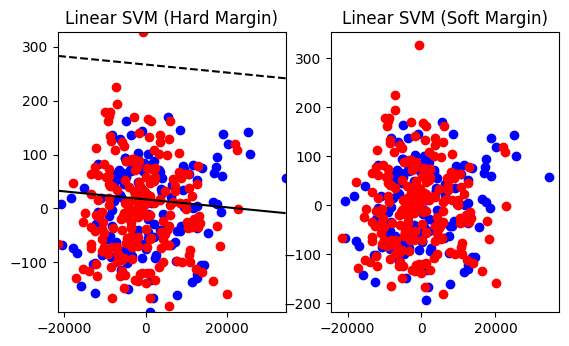

In [10]:
# Plot decision boundaries
plt.figure(figsize=(10, 8))

# Plot the decision boundary for linear SVM with hard margin
plt.subplot(231)
plt.title("Linear SVM (Hard Margin)")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='b', label='Class 1')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='r', label='Class 0')
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50))
Z = linear_svm_hard.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot the decision boundaries for linear SVM with soft margin (best penalty)
plt.subplot(232)
plt.title("Linear SVM (Soft Margin)")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='b', label='Class 1')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='r', label='Class 0')
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50))
Z = linear_svm_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot the decision boundaries for polynomial SVM (best penalty and degree)
plt.subplot(233)
plt.title("Polynomial SVM (Degree=4)")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='b', label='Class 1')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='r', label='Class 0')
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50))
Z = poly_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot the decision boundaries for RBF SVM (best penalty and sigma)
plt.subplot(234)
plt.title("RBF SVM (Sigma=1)")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='b', label='Class 1')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='r', label='Class 0')
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 50),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 50))
Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()